In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

import sys
sys.path.append('../code_general_Finkelsteinlab')
import plotting_Finkelsteinlab as pltData
reload(pltData);

model_ID = 'Clv_init_limit_Saturated_general_energies_v2'
times = [0.0,12.0,60.0,180.0,600.0,1800.0,6000.0,18000.0,60000.0]
guide = 20

path_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename_data = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

### Show result of fit

In [12]:
filename = 'fit_25_2_2019_sim_3.txt'
path = '25_2_2019/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 43']
final_par_np = final_par.values
chi = data.loc[:,'Potential']
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,...,Parameter 36,Parameter 37,Parameter 38,Parameter 39,Parameter 40,Parameter 41,Parameter 42,Parameter 43,Potential,Equilibruim
399,-0.559435,-6.152962,1.449609,3.438846,5.287311,-9.499053,3.910763,-2.025907,3.592799,8.538016,...,-9.778146,-0.640084,-2.686951,-1.624989,-5.676060,-2.941850,2.811063,-0.168702,57063.343540,True
400,-0.802766,-6.010233,1.505519,3.578631,5.464885,-9.645647,4.141314,-2.027167,3.531701,8.570494,...,-9.905081,-0.600441,-2.698866,-1.561534,-5.834377,-2.908529,2.808430,-0.161840,57060.343421,False
401,-0.827047,-6.025701,1.508560,3.699700,5.592905,-9.747959,4.003683,-1.853821,3.541692,8.490304,...,-9.767103,-0.446176,-2.780301,-1.564152,-6.068863,-2.765891,2.788402,-0.154119,57076.504099,True
402,-0.557587,-5.761185,1.600815,3.568515,5.670411,-9.658347,4.059434,-1.975767,3.593552,8.521300,...,-9.720430,-0.496482,-2.643982,-1.665382,-5.880026,-2.687644,2.727625,-0.125843,57067.687169,False
403,-0.630967,-5.803106,1.587963,3.489783,5.779813,-9.664958,4.032323,-1.766583,3.942498,8.457269,...,-9.860157,-0.459651,-2.642346,-1.709579,-5.854997,-2.462331,2.610961,-0.289133,57060.529439,False


## Single mismatches

(array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
        1.e+01]), <a list of 9 Text yticklabel objects>)

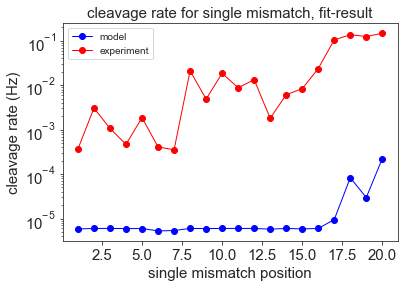

In [9]:
data_exp = pd.read_csv(path_data + filename_data)
k_exp_pd = pltData.plot_single_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, data_name='cleavage rate (Hz)', Plot=False, 
                                                    logplot=False, SaveFigures=False)
k_exp = k_exp_pd.values[:,1]


k = np.zeros(20)
for i in range(1,guide+1):
    mismatch = [i]
    k[i-1] = clv.calc_clv_rate(final_par_np,model_ID,mismatch,times,guide)
    
plt.figure
plt.semilogy(range(1,21),k, marker='o', linewidth=1, color='blue')
plt.semilogy(range(1,21),k_exp, marker='o', linewidth=1, color='red')
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)
plt.legend(['model','experiment'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Double mismatches

Text(0.5,1,'double mismatches, top=model bottom=experiment')

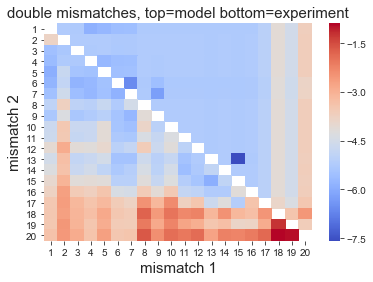

In [13]:
data_exp = pd.read_csv(path_data + filename_data)
_, k_matrix_exp = pltData.plot_double_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='cleavage rate (Hz)', Plot=False, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')
k_matrix_exp.fillna(0, inplace=True)

k_matrix = np.zeros([20,20])

for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_matrix[i-1,j-1] = np.log10(clv.calc_clv_rate(final_par_np,model_ID,mismatch_positions,times,guide))
        
k_df = pd.DataFrame(k_matrix, index=range(1, 21), columns=range(1, 21))
combined_df = k_df + k_matrix_exp

for i in range(1,21):
    combined_df[i].loc[i]=np.nan

sns.heatmap(combined_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=model bottom=experiment', fontsize=15)


## Chi squared evolution

(array([56500., 57000., 57500., 58000., 58500., 59000., 59500., 60000.,
        60500.]), <a list of 9 Text yticklabel objects>)

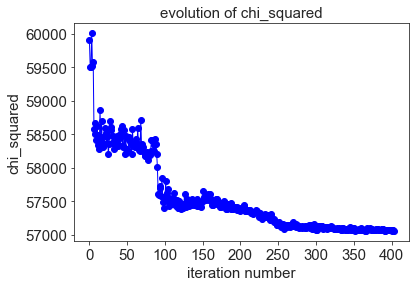

In [5]:
plt.plot(chi, marker='o', linewidth=1, color='blue')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('chi_squared', fontsize=15)
plt.title('evolution of chi_squared', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)